In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.1 MB/s eta 0:00:00a 0:00:01


In [4]:
!pip install ultralytics --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.1 MB/s eta 0:00:0000:010:01
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.8.4 requires fastcore<1.9,>=1.8.0, but you have fastcore 1.11.3 which is incompatible.


In [5]:
import os
import yaml
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", font="SimHei", rc={"axes.unicode_minus":False})

import torch
from ultralytics import YOLO

from PIL import Image

seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
model = YOLO("yolo26n.pt")

In [7]:
config = {
    "path": "/kaggle/input/the-drug-name-detection-dataset",
    "train": "/kaggle/input/the-drug-name-detection-dataset/train",
    "val": "/kaggle/input/the-drug-name-detection-dataset/valid",
    "test": "/kaggle/input/the-drug-name-detection-dataset/test",
    "nc": 1,
    "names": ["drug-name"],
}

with open("data.yaml", "w") as file:
    yaml.dump(config, file, default_flow_style=False)

In [8]:
!wandb disabled

/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

In [9]:
results = model.train(data="data.yaml", epochs=60, save_period=10, seed=seed, name="yolo26n")

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo26n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolo26n, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 114 weight(decay=0.0), 126 weight(decay=0.0005), 126 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/runs/detect/yolo26n
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       1/60      2.38G      1.637      8.594    0.01306         20        640: 100% ━━━━━━━━━━━━ 80/80 2.1it/s 37.6s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 12/12 1.4it/s 8.5s0.2s
                   all        365        364    0.00414       0.67     0.0733     0.0328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       2/60      2.91G      1.517      5.829    0.01177         18     

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

                   all        365        364      0.674      0.637        0.7      0.449
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /kaggle/working/runs/detect/yolo26n


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

In [10]:
metrics = model.val()

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO26n summary (fused): 122 layers, 2,375,031 parameters, 0 gradients, 5.2 GFLOPs
val: Fast image access ✅ (ping: 1.8±2.7 ms, read: 56.3±38.6 MB/s, size: 31.3 KB)
val: Scanning /kaggle/input/the-drug-name-detection-dataset/valid/labels... 365 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 365/365 838.7it/s 0.4s0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/the-drug-name-detection-dataset/valid is not writable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 44, len(boxes) = 364. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 23/23 5.7it/s 4.0s0.1s


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

                   all        365        364      0.674      0.638        0.7      0.449
Speed: 1.8ms preprocess, 4.5ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to /kaggle/working/runs/detect/val


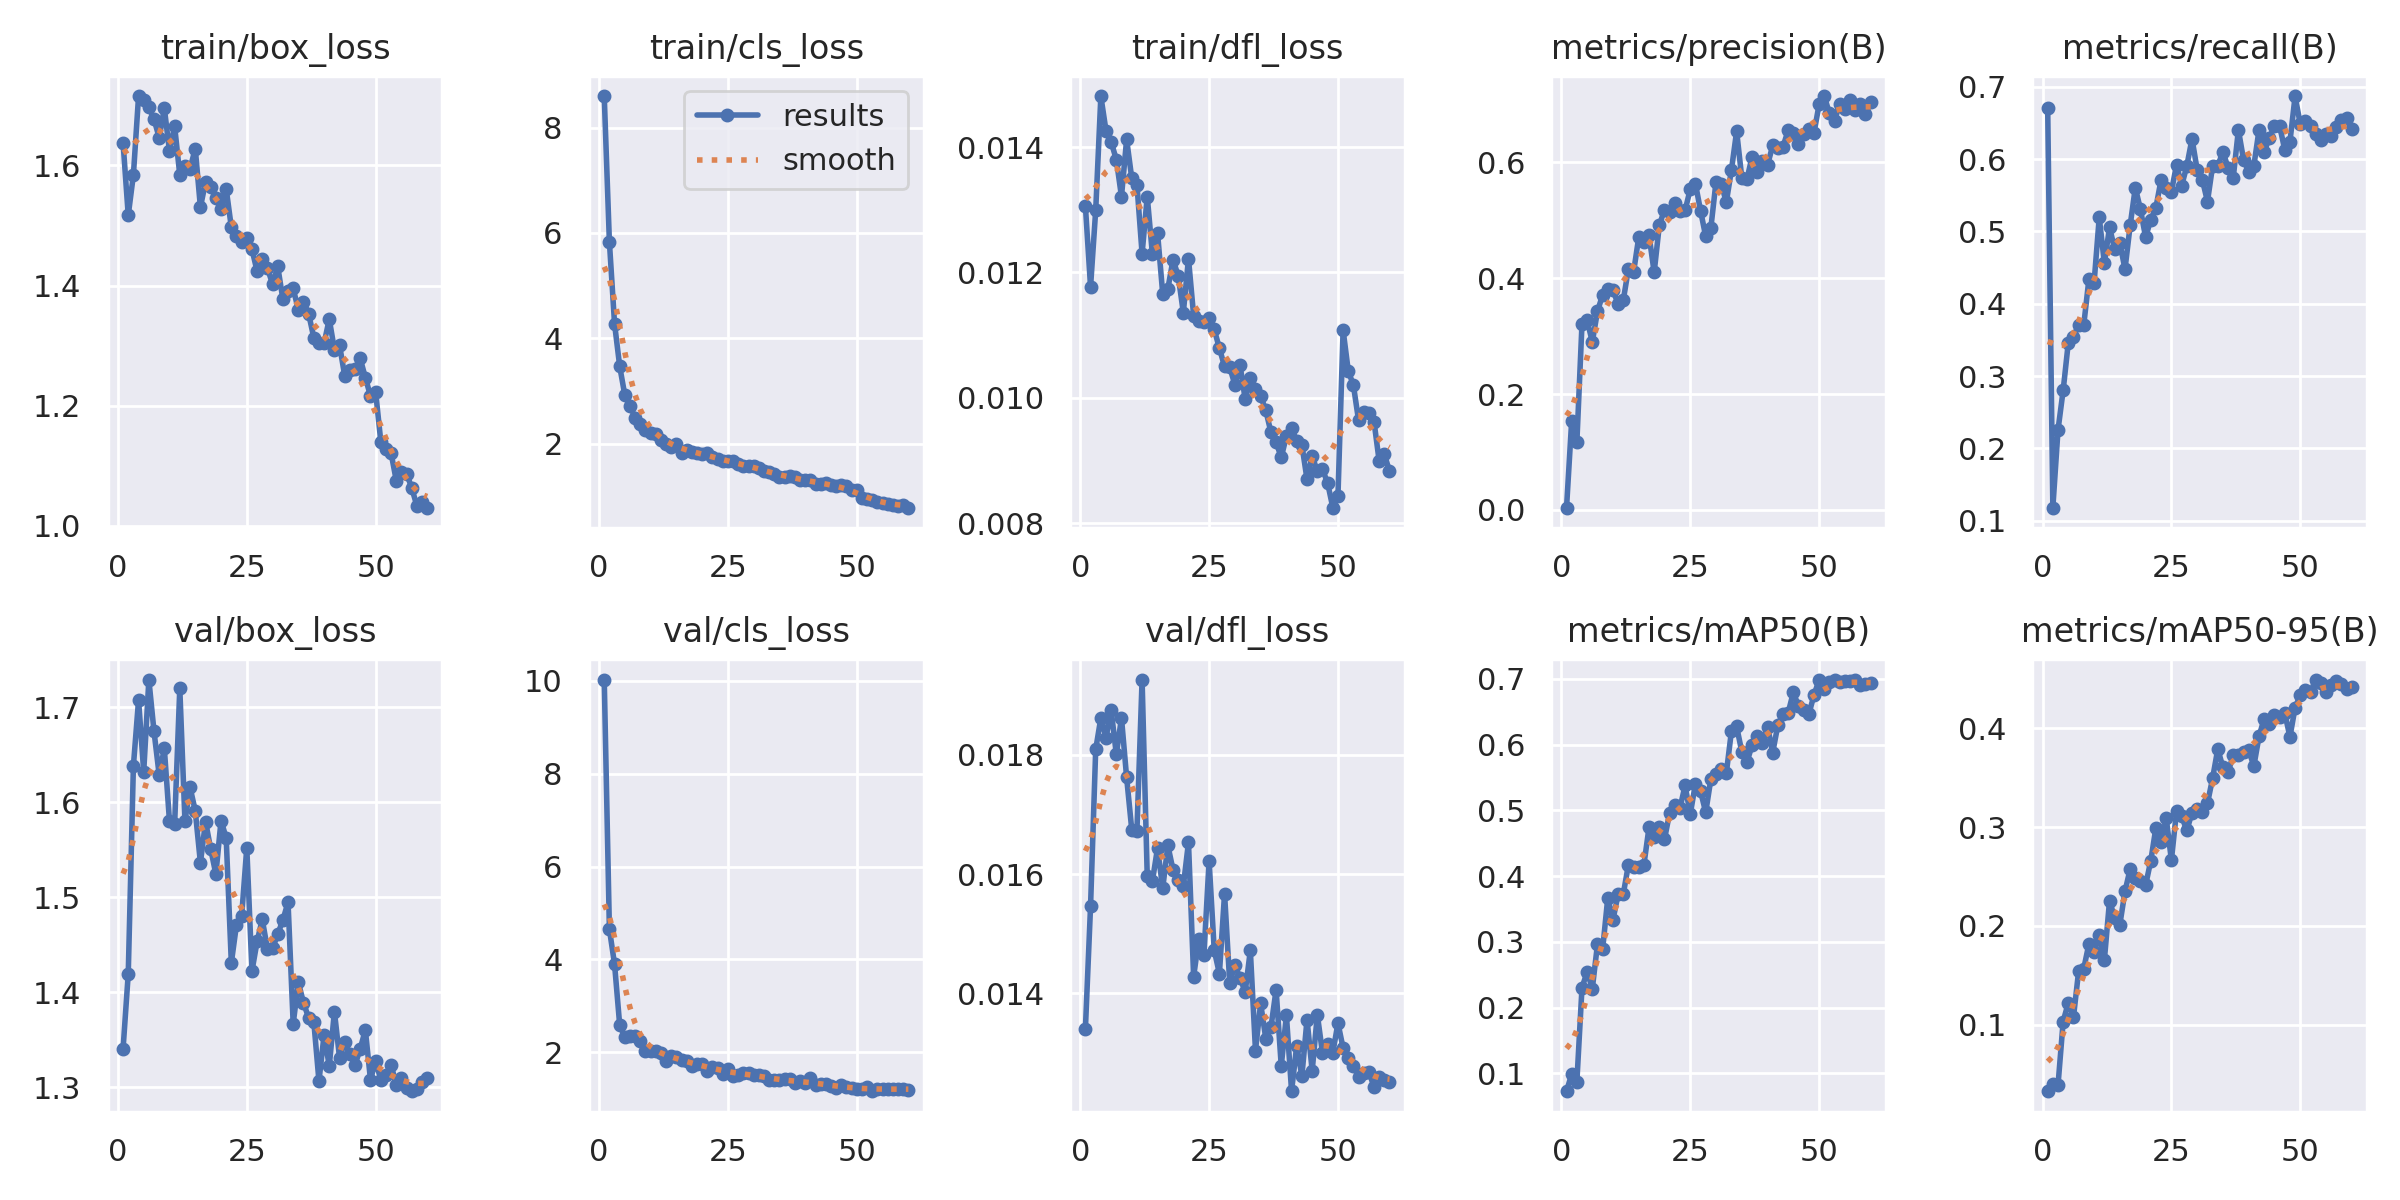

In [12]:
Image.open("/kaggle/working/runs/detect/yolo26n/results.png")

In [13]:
from ultralytics import YOLO

model = YOLO("/kaggle/working/runs/detect/yolo26n/weights/best.pt")

model.predict(
    source="/kaggle/input/the-drug-name-detection-dataset/test/images",
    conf=0.3,
    save=True
)


image 1/182 /kaggle/input/the-drug-name-detection-dataset/test/images/20230812_210244_jpg.rf.a2373a15c967eb6a157295e74fc71f45.jpg: 640x640 (no detections), 13.1ms
image 2/182 /kaggle/input/the-drug-name-detection-dataset/test/images/20230812_210441_jpg.rf.304261eeea390228fdd99f23079290aa.jpg: 640x640 1 drug-name, 11.6ms
image 3/182 /kaggle/input/the-drug-name-detection-dataset/test/images/20230812_213537_jpg.rf.ca0e0d0d8c6190258312e46cca65d229.jpg: 640x640 1 drug-name, 12.0ms
image 4/182 /kaggle/input/the-drug-name-detection-dataset/test/images/20230812_214043_jpg.rf.0df6b253cf09bd47d9ffd72f8158b5d6.jpg: 640x640 (no detections), 11.7ms
image 5/182 /kaggle/input/the-drug-name-detection-dataset/test/images/20230812_215836_jpg.rf.c9608220426c128e75c907d143f77f9a.jpg: 640x640 1 drug-name, 11.3ms
image 6/182 /kaggle/input/the-drug-name-detection-dataset/test/images/20230812_215916_jpg.rf.73cc868bb2038044a6820f8607aae04e.jpg: 640x640 1 drug-name, 11.8ms
image 7/182 /kaggle/input/the-drug-na

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'drug-name'}
 obb: None
 orig_img: array([[[186, 189, 194],
         [186, 189, 194],
         [186, 189, 194],
         ...,
         [181, 184, 198],
         [181, 184, 198],
         [181, 184, 198]],
 
        [[186, 189, 194],
         [186, 189, 194],
         [187, 190, 195],
         ...,
         [181, 184, 198],
         [181, 184, 198],
         [181, 184, 198]],
 
        [[186, 189, 194],
         [187, 190, 195],
         [187, 190, 195],
         ...,
         [181, 184, 198],
         [181, 184, 198],
         [181, 184, 198]],
 
        ...,
 
        [[176, 180, 181],
         [176, 180, 181],
         [176, 180, 181],
         ...,
         [114, 124, 141],
         [114, 124, 141],
         [114, 124, 141]],
 
        [[176, 180, 181],
         [176, 180, 181],
         [176, 180, 181],
         ...,
         [114, 

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

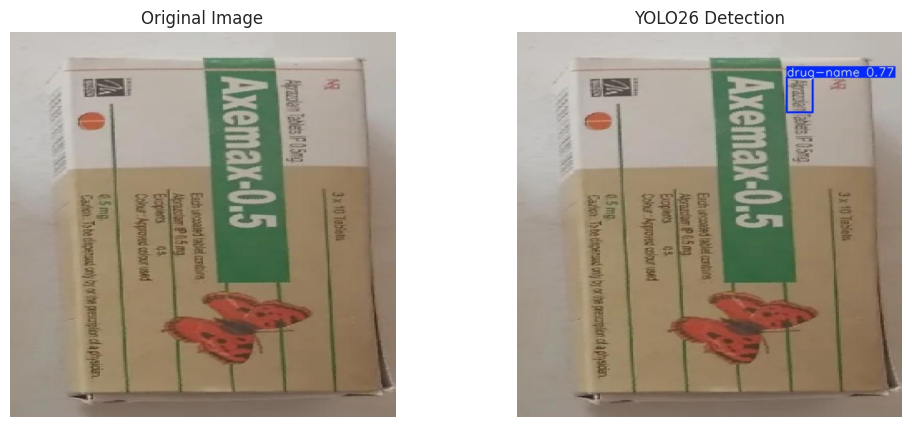

In [16]:
import cv2
import matplotlib.pyplot as plt

img_before = cv2.imread("/kaggle/input/the-drug-name-detection-dataset/test/images/20230812_213537_jpg.rf.ca0e0d0d8c6190258312e46cca65d229.jpg")
img_after = cv2.imread("/kaggle/working/runs/detect/predict/20230812_213537_jpg.rf.ca0e0d0d8c6190258312e46cca65d229.jpg")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img_before, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,2,2)
plt.title("YOLO26 Detection")
plt.imshow(cv2.cvtColor(img_after, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()